In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1 

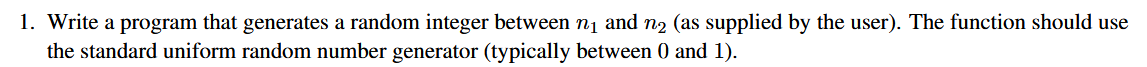

In [2]:
def random_betw(x,y):
    low  = x if x < y else y
    high = y if x < y else x
    
    '''between x and y integers there are |x-y|+1  possible integers so its like position of number after the lowest number.
     so random.rand() gives 0 to 1 so now our values will be [0 to |x-y|+1)  so like our range this now we need to convert this
     float to integer and add the lowest number so that it will be between x and y always '''
    
    temp = np.random.rand()   
    temp*= high-low +1
    num =  low + int(temp)
    
    return num


n1 = 4
n2 = 9

num_between = random_betw(n1,n2);
print(f'A number between {n1} and {n2} is : {num_between}')    

A number between 4 and 9 is : 6


# Question 2 

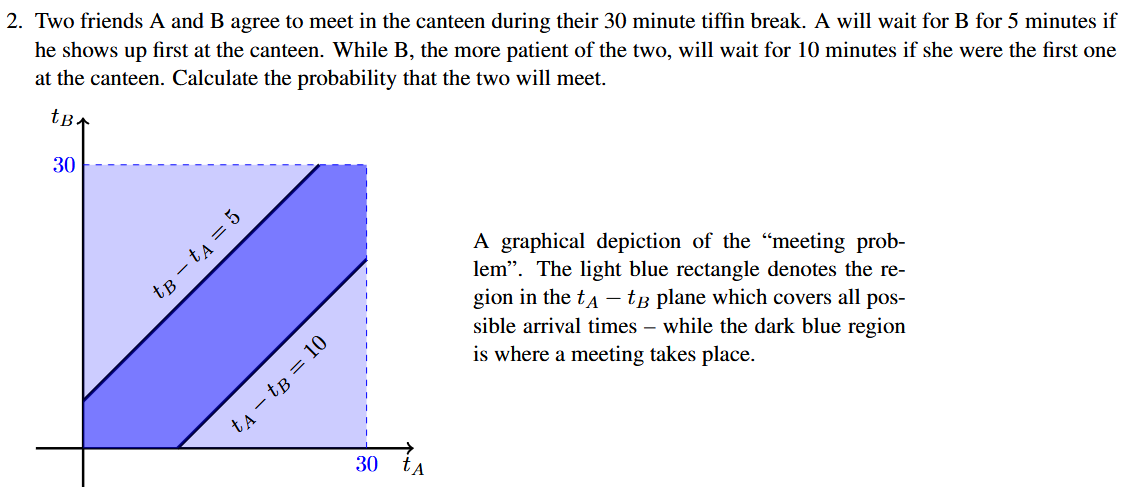

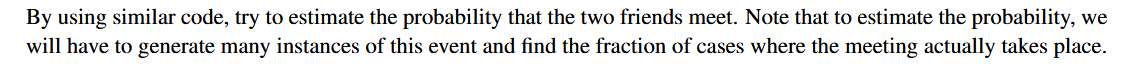

In [3]:
def meet(break_time,A_wait,B_wait):
    t_A = np.random.rand() * break_time
    t_B = np.random.rand() * break_time
    
    ''' if t_A can wait more then t_B - t_A should be A's waiting time as t_B came within those time and vice versa 
    '''
    # B came first
    if t_A >= t_B and t_A - t_B <= B_wait:   
        return 1
    
    # A came first
    if t_B >= t_A and t_B - t_A <= A_wait:
        return 1
    else:
        return 0


In [4]:
break_time = 30
A_wait = 10
B_wait = 5

N = 100000  # trails
results = np.zeros(N)

for i in range(N):
    results[i] = meet(break_time,A_wait,B_wait)
    
prob_meet = np.sum(results)/N
print(f'The sucess rate of meeting of A and B is {prob_meet}')

The sucess rate of meeting of A and B is 0.43021


# Question 3

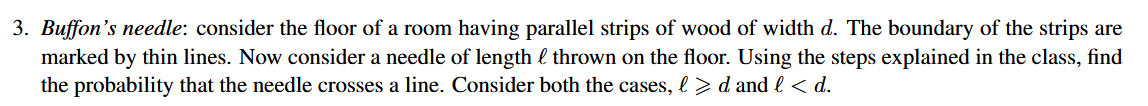


'''
let x be the distance of centre of needle to the nearest parallel line . and let theta be the angle between the line passing 
through the center which is parallel to the  strips. Now clearly the projection of needle perpendicular is $\dfrac{l}{2}\sin(\theta)$. So now 
clearly if this x is less than that then clearly the needle will be projrcting out of the parallel strip so it crosses teh line.

Here theta ranges from 0 to pi/2 and x ranges from 0 to d/2  0 if it is on the parllel strip coincident and d/2 if it is exactly 
halfway between the strips.
'''

In [5]:
# note : here i have taken equality or on the line is also crossing .
import numpy as np

l_small = 0.2
l_long  = 5
d = 1.0
trials = 1000000

def needle_prob(l, d, trials):
    if l <= 0 or d <= 0:
        print("The lengths must always be greater than zero.")
        return 0

    crosses = 0

    for i in range(trials):
        x =  np.random.uniform(0, d/2)         # to include both 0 and d/2
        theta = np.random.uniform(0, np.pi/2) # to include both 
        
        # case 1 
        if l < d:
            if x <= (l / 2) * np.sin(theta):
                crosses += 1
                
        # case 2       
        else:  # l >= d
            
            # case (a)
            #  at limiting angle if theta >= arcsin(d/l) it alwasys crosses
            if np.sin(theta) >= (d / l):
                crosses += 1
                
            #case(b)
            # if theta is less we can use same as that of l<d case type argument
            elif x <= (l / 2) * np.sin(theta):
                crosses += 1

    prob = crosses / trials
    return prob

print(f"The probability of crossing a line for needle length :{l_small} and width of strips:{d} (l < d)  is {needle_prob(l_small, d, trials)}")
print(f"The probability of crossing a line for needle length :{l_long}   and width of strips :{d} (l > d)  is {needle_prob(l_long, d, trials)}")


The probability of crossing a line for needle length :0.2 and width of strips:1.0 (l < d)  is 0.127306
The probability of crossing a line for needle length :5   and width of strips :1.0 (l > d)  is 0.935896


# Question 4

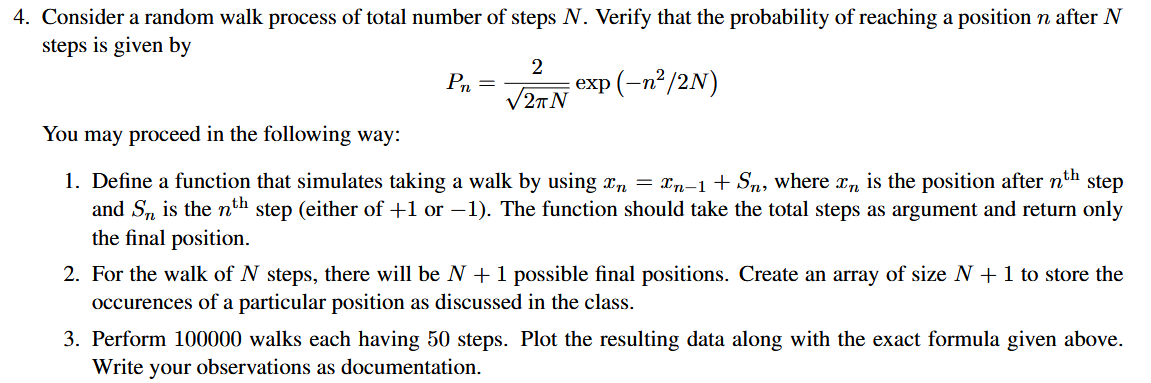

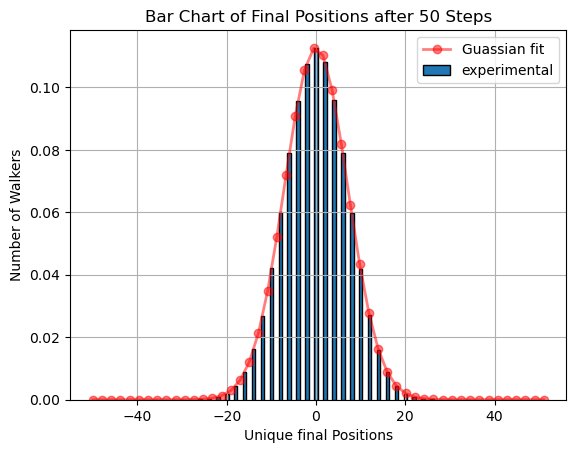

In [6]:
def step():
    return 1 if np.random.rand() < 0.5 else -1
def prob_n(x,N):
    return (2/(2*np.pi*N)**0.5)*np.exp(-x**2/(2*N))



trials = 1000000
total_steps = 50

positions = np.zeros(trials)

for i in range(trials):
    x=0
    for j in range(total_steps):
        x += step()
    
    positions[i] = x

# Counting how many times each position occurs
unique_positions, counts = np.unique(positions, return_counts=True)     # it gives the unique positions and their counts as well
counts = counts/trials  # normalized counts 

# Plotting using bar chart
plt.bar(unique_positions, counts, edgecolor='black',label = "experimental")
plt.xlabel("Unique final Positions")
plt.ylabel("Number of Walkers")
plt.title(f"Bar Chart of Final Positions after {total_steps} Steps")
plt.grid(True)



# plotting using the formula
xs = np.linspace(-total_steps, total_steps+1)    # total range of the possible final positions
ys = [prob_n(i, total_steps) for i in xs]

plt.plot(xs,ys,"o-r",lw = 2,alpha = 0.5,label = "Guassian fit");
plt.legend()
plt.show()


We observe that when number of trials is large it takes a guassian distribution which is clearly evident by plotting the predicted guassian fit on to the bar graph at each possible final position.

# Question 5

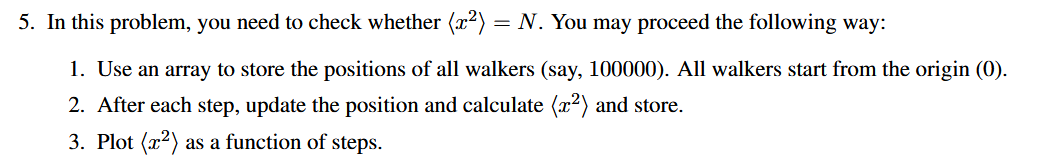

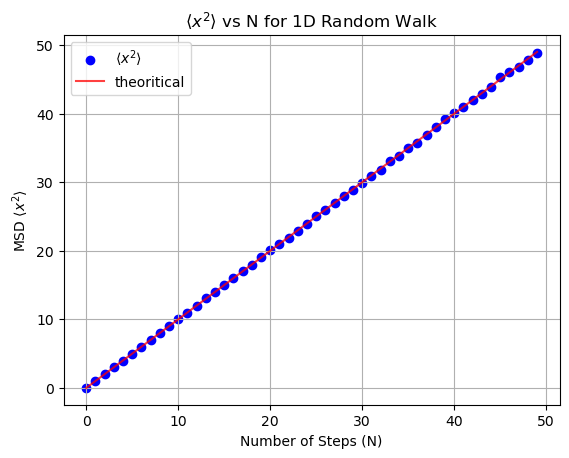

In [7]:
N = np.arange(0,50)
trials = 100000
mean_squared = np.zeros(len(N))

# same code except now the total_steps is variable from 0 to 20 or anything

for i,steps_total in enumerate(N):
    positions = np.zeros(trials)
    for j in range(trials):
        x=0
        for k in range(steps_total):
            x += step()

        positions[j] = x
    mean_squared[i] = np.sum(positions**2)/trials
    
# plotting    
plt.scatter(N, mean_squared, color = "blue", label=r"$\langle x^2 \rangle$")
plt.plot(N,N,"r",label = "theoritical",alpha = 0.75)

plt.xlabel("Number of Steps (N)")
plt.ylabel(r"MSD $\langle x^2 \rangle$")
plt.title(r"$\langle x^2 \rangle$ vs N for 1D Random Walk")

plt.grid(True)
plt.legend()
plt.show()